In [8]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Thiết lập hiển thị
sns.set_theme(style="whitegrid")

# 2. Định nghĩa đường dẫn
BASE_DIR = '..'
PROCESSED_DIR = os.path.join(BASE_DIR, 'processed', 'brussels')
FIGURES_DIR = os.path.join(BASE_DIR, 'figures')
os.makedirs(FIGURES_DIR, exist_ok=True)

# 3. Đọc các file KPI đã tính toán từ File 02
CITY_SUFFIX = 'brussels'

try:
    # Đọc file Supply
    kpi_supply = pd.read_csv(os.path.join(PROCESSED_DIR, f'kpi_supply_{CITY_SUFFIX}.csv'))
    
    # Đọc file Price
    kpi_price = pd.read_csv(os.path.join(PROCESSED_DIR, f'kpi_price_{CITY_SUFFIX}.csv'))
    
    # Đọc file Room Type
    kpi_room = pd.read_csv(os.path.join(PROCESSED_DIR, f'kpi_room_type_{CITY_SUFFIX}.csv'))
    
    print("✅ Đã nạp thành công 3 bảng KPI.")
    
    # --- XỬ LÝ SẮP XẾP THỜI GIAN ---
    # Vì đọc từ CSV lên, python hiểu ngày tháng là chuỗi, ta cần chuyển lại thành datetime để vẽ biểu đồ đúng thứ tự
    def sort_by_date(df):
        df['snapshot_datetime'] = pd.to_datetime(df['snapshot_date'])
        return df.sort_values('snapshot_datetime')

    kpi_supply = sort_by_date(kpi_supply)
    kpi_price = sort_by_date(kpi_price)
    # Với room type, ta cần mẹo một chút để sắp xếp khi vẽ
    kpi_room['snapshot_datetime'] = pd.to_datetime(kpi_room['snapshot_date'])
    kpi_room = kpi_room.sort_values('snapshot_datetime')
    
    print("✅ Đã sắp xếp dữ liệu theo thời gian (Quá khứ -> Tương lai).")
    
except FileNotFoundError:
    print("❌ LỖI: Không tìm thấy file KPI. Hãy chắc chắn bạn đã chạy xong File 02!")

✅ Đã nạp thành công 3 bảng KPI.
✅ Đã sắp xếp dữ liệu theo thời gian (Quá khứ -> Tương lai).


--- BẮT ĐẦU VẼ BIỂU ĐỒ ---


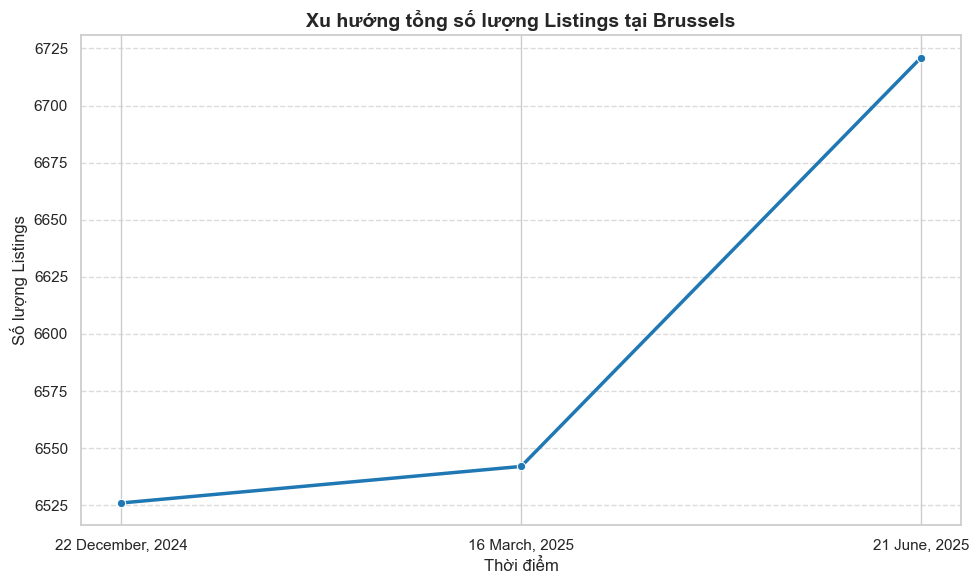

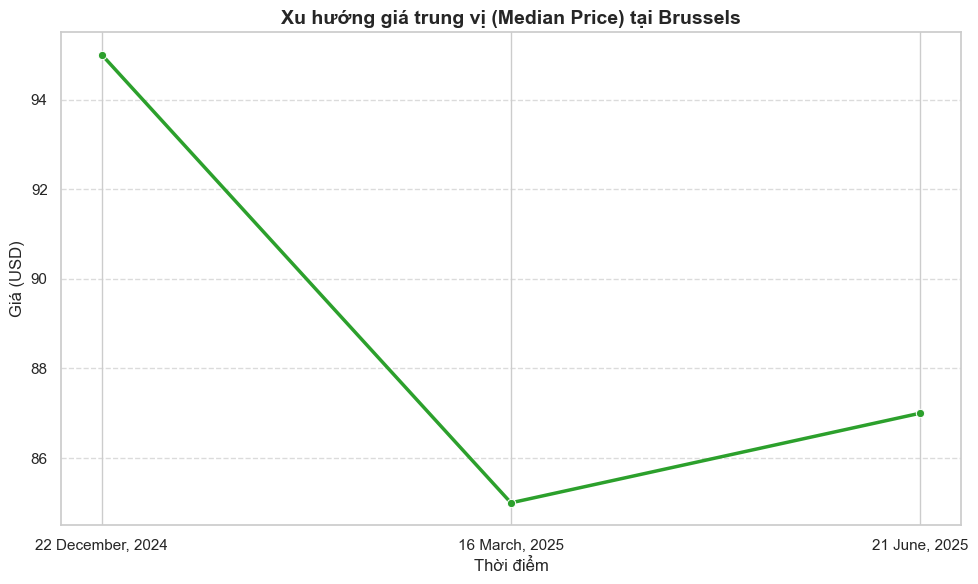

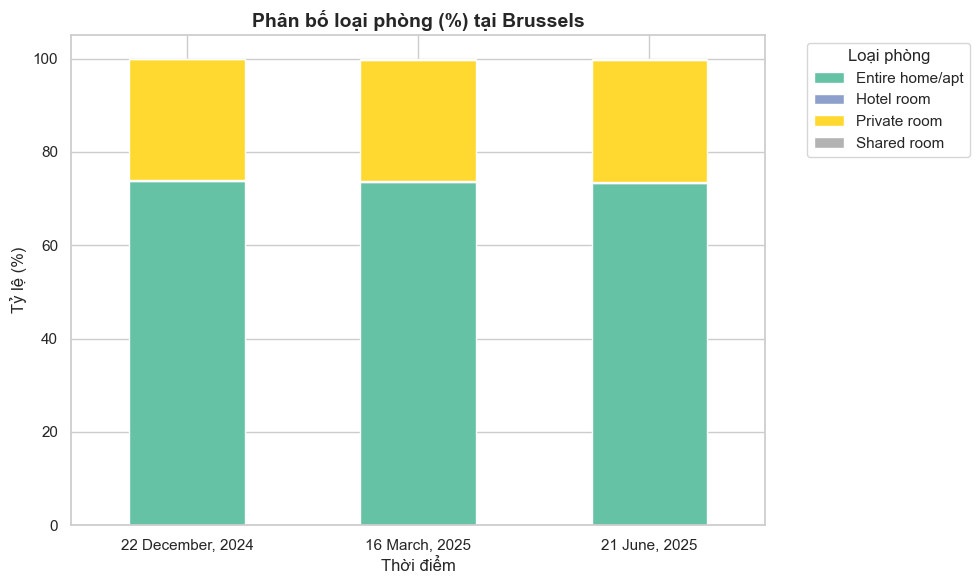

In [9]:
print("--- BẮT ĐẦU VẼ BIỂU ĐỒ ---")

# --- HÌNH 1: Xu hướng Nguồn Cung ---
plt.figure(figsize=(10, 6))
sns.lineplot(data=kpi_supply, x='snapshot_date', y='total_listings', marker='o', linewidth=2.5, color='#1f77b4')
plt.title('Xu hướng tổng số lượng Listings tại Brussels', fontsize=14, fontweight='bold')
plt.ylabel('Số lượng Listings')
plt.xlabel('Thời điểm')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# THAY ĐỔI Ở ĐÂY: Lưu đuôi .pdf
pdf_path_1 = os.path.join(FIGURES_DIR, 'brussels_supply_trend.pdf')
plt.savefig(pdf_path_1, format='pdf', bbox_inches='tight')
plt.show()


# --- HÌNH 2: Xu hướng Giá ---
plt.figure(figsize=(10, 6))
sns.lineplot(data=kpi_price, x='snapshot_date', y='median_price', marker='o', linewidth=2.5, color='#2ca02c')
plt.title('Xu hướng giá trung vị (Median Price) tại Brussels', fontsize=14, fontweight='bold')
plt.ylabel('Giá (USD)')
plt.xlabel('Thời điểm')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# THAY ĐỔI Ở ĐÂY: Lưu đuôi .pdf
pdf_path_2 = os.path.join(FIGURES_DIR, 'brussels_price_trend.pdf')
plt.savefig(pdf_path_2, format='pdf', bbox_inches='tight')
plt.show()


# --- HÌNH 3: Cơ cấu Loại phòng ---
# Pivot dữ liệu
kpi_room_pivot = kpi_room.pivot(index='snapshot_date', columns='room_type', values='percentage')
# Reindex để đảm bảo đúng thứ tự
kpi_room_pivot = kpi_room_pivot.reindex(kpi_supply['snapshot_date'])

kpi_room_pivot.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Set2', edgecolor='white')
plt.title('Phân bố loại phòng (%) tại Brussels', fontsize=14, fontweight='bold')
plt.ylabel('Tỷ lệ (%)')
plt.xlabel('Thời điểm')
plt.xticks(rotation=0)
plt.legend(title='Loại phòng', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# THAY ĐỔI Ở ĐÂY: Lưu đuôi .pdf
pdf_path_3 = os.path.join(FIGURES_DIR, 'brussels_room_type_dist.pdf')
plt.savefig(pdf_path_3, format='pdf', bbox_inches='tight')
plt.show()